In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
print(f"{pd.__version__}, {np.__version__}")

2.1.1, 1.26.1


In [3]:
df = pd.read_csv("data/lab1-baby-20231019.csv", encoding="cp949")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 937 entries, 시군구별 to 2022.12.2
dtypes: object(937)
memory usage: 139.2+ KB


In [5]:
df.head(2)

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2022.09.2,2022.10,2022.10.1,2022.10.2,2022.11,2022.11.1,2022.11.2,2022.12,2022.12.1,2022.12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,10715,20646,10530,10116,18981,9737,9244,16896,8684,8212


In [6]:
df_melt = df.melt(id_vars = "시군구별")

In [7]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17784 entries, 0 to 17783
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구별      17784 non-null  object
 1   variable  17784 non-null  object
 2   value     17784 non-null  object
dtypes: object(3)
memory usage: 416.9+ KB


In [8]:
df_melt["시군구별"].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [9]:
df_melt = df_melt[df_melt["시군구별"] != "시군구별"]

In [10]:
df_melt["시군구별"].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [11]:
df_melt.head()

,시군구별,variable,value
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
5,인천광역시,1997.01,3646


In [12]:
df_melt["연도"] = df_melt["variable"].str.split(".", expand=True)[0]
df_melt["월"] = df_melt["variable"].str.split(".", expand=True)[1]
df_melt["성별"] = df_melt["variable"].str.split(".", expand=True)[2]

In [13]:
df_melt["성별"] = df_melt["성별"].fillna("전체")
df_melt["성별"] = df_melt["성별"].replace("1", "남자").replace("2", "여자")

In [14]:
df_melt["성별"].unique()

array(['전체', '남자', '여자'], dtype=object)

In [15]:
df_melt = df_melt.rename(columns={"variable": "기간", "value": "출생아수"})

In [16]:
df_melt["출생아수"] = df_melt["출생아수"].replace("-", np.nan).astype(float)
df_melt["출생아수"]

1        63268.0
2        13205.0
3         4201.0
4         3345.0
5         3646.0
          ...   
17779      229.0
17780      250.0
17781      366.0
17782      503.0
17783      121.0
Name: 출생아수, Length: 16848, dtype: float64

In [17]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16848 entries, 1 to 17783
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    16848 non-null  object 
 1   기간      16848 non-null  object 
 2   출생아수    16308 non-null  float64
 3   연도      16848 non-null  object 
 4   월       16848 non-null  object 
 5   성별      16848 non-null  object 
dtypes: float64(1), object(5)
memory usage: 921.4+ KB


In [18]:
df_all = df_melt[(df_melt["시군구별"] == "전국") & (df_melt["성별"] == "전체")]

In [19]:
df_pivot_table = df_all.pivot_table(index="연도", values="출생아수", aggfunc="sum")
df_pivot_table

,출생아수
연도,
1997,675394.0
1998,641594.0
1999,620668.0
2000,640089.0
2001,559934.0
2002,496911.0
2003,495036.0
2004,476958.0
2005,438707.0


<Axes: xlabel='연도'>

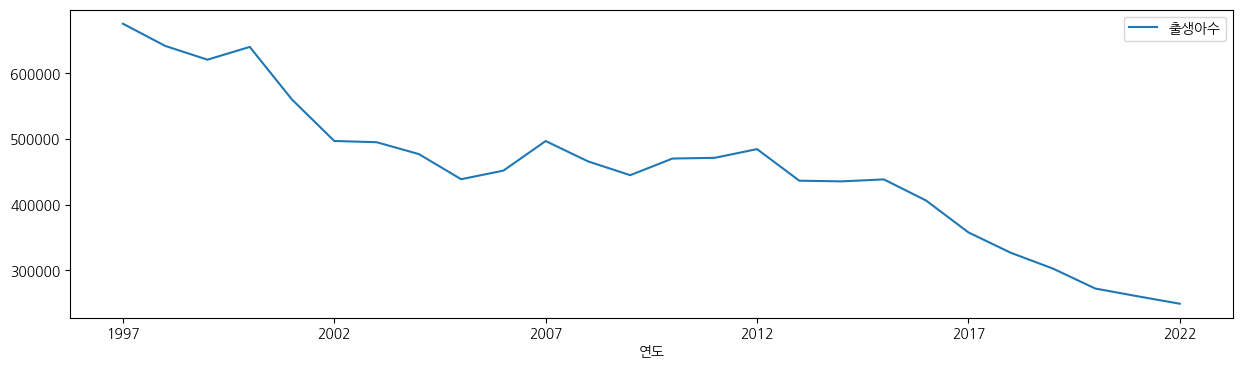

In [20]:
df_pivot_table.plot(figsize=(15,4))

<Axes: xlabel='연도,월'>

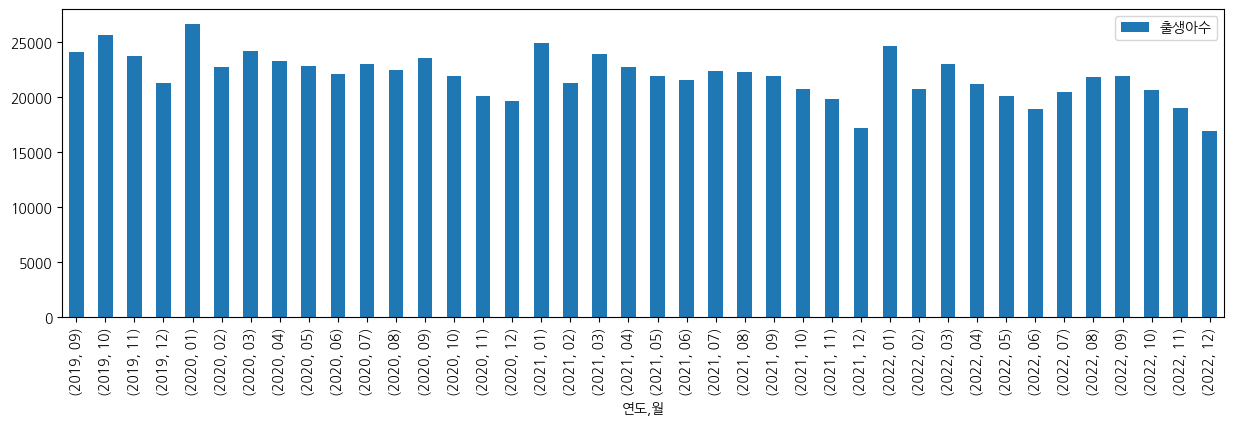

In [21]:
df_all[-40:].set_index(["연도", "월"]).plot.bar(figsize=(15, 4))

<Axes: xlabel='연도', ylabel='출생아수'>

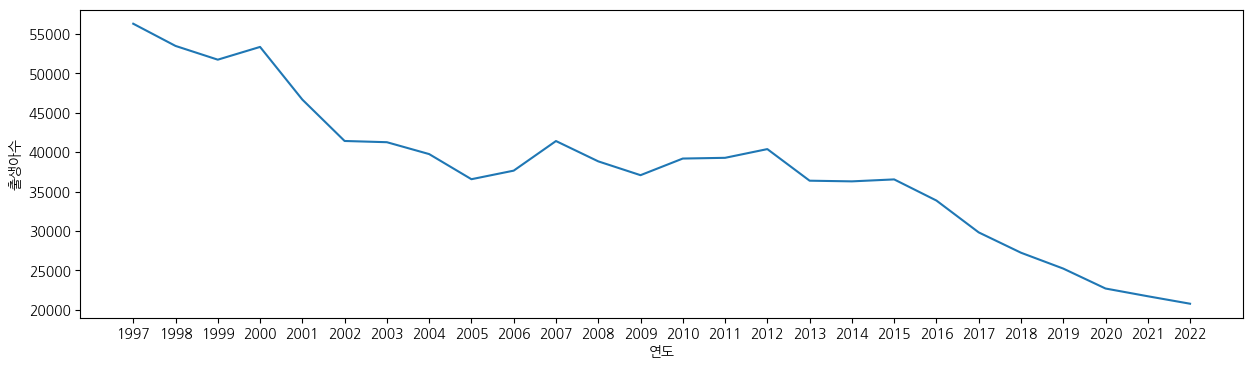

In [22]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="출생아수", data=df_all, errorbar=None)

<Axes: xlabel='연도', ylabel='출생아수'>

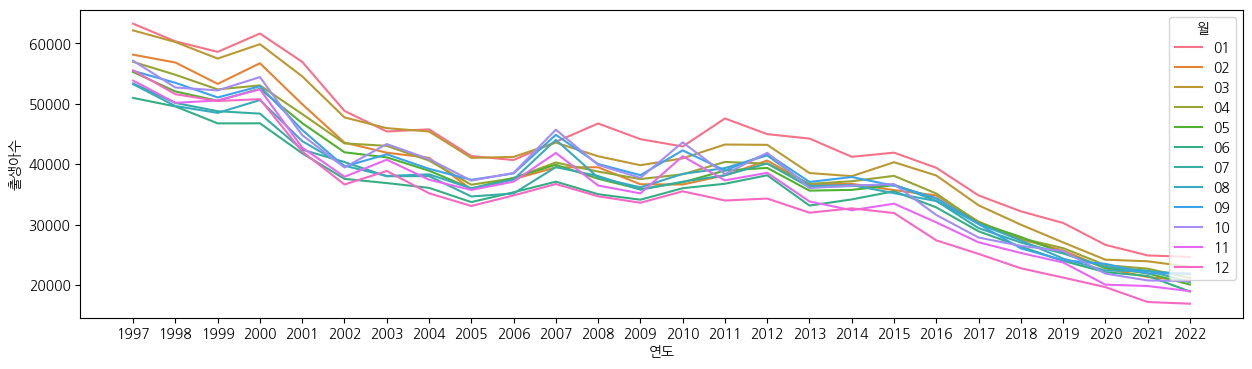

In [23]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="출생아수", data=df_all, errorbar=None, hue="월")

<Axes: xlabel='연도', ylabel='출생아수'>

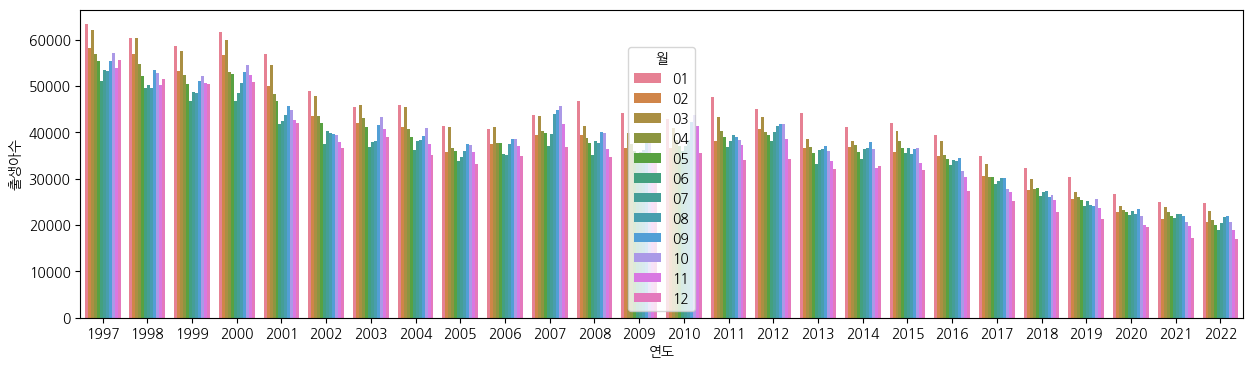

In [24]:
plt.figure(figsize=(15, 4))
sns.barplot(x="연도", y="출생아수", data=df_all, errorbar=None, hue="월")

In [25]:
df_local = df_melt[df_melt["시군구별"] != "전국"].copy()
df_local.head()

,시군구별,기간,출생아수,연도,월,성별
2,서울특별시,1997.01,13205.0,1997,01,전체
3,부산광역시,1997.01,4201.0,1997,01,전체
4,대구광역시,1997.01,3345.0,1997,01,전체
5,인천광역시,1997.01,3646.0,1997,01,전체
6,광주광역시,1997.01,2166.0,1997,01,전체


<Axes: xlabel='연도', ylabel='출생아수'>

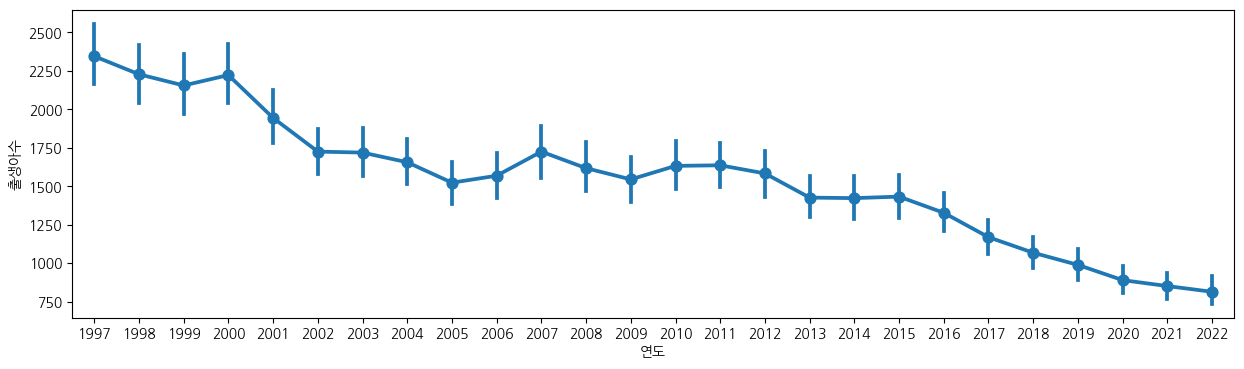

In [26]:
plt.figure(figsize=(15, 4))
sns.pointplot(x="연도", y="출생아수", data=df_local)

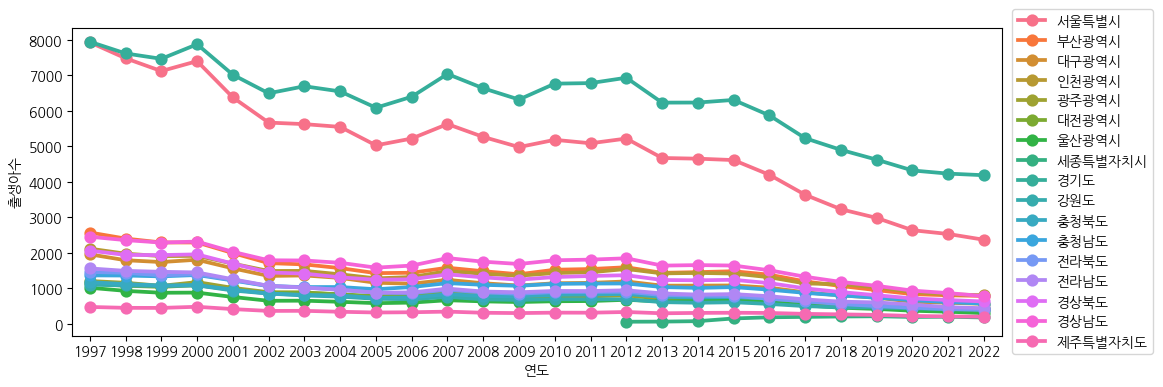

In [27]:
plt.figure(figsize=(12, 4))
sns.pointplot(x="연도", y="출생아수", hue="시군구별",  data=df_local, errorbar=None)
plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)

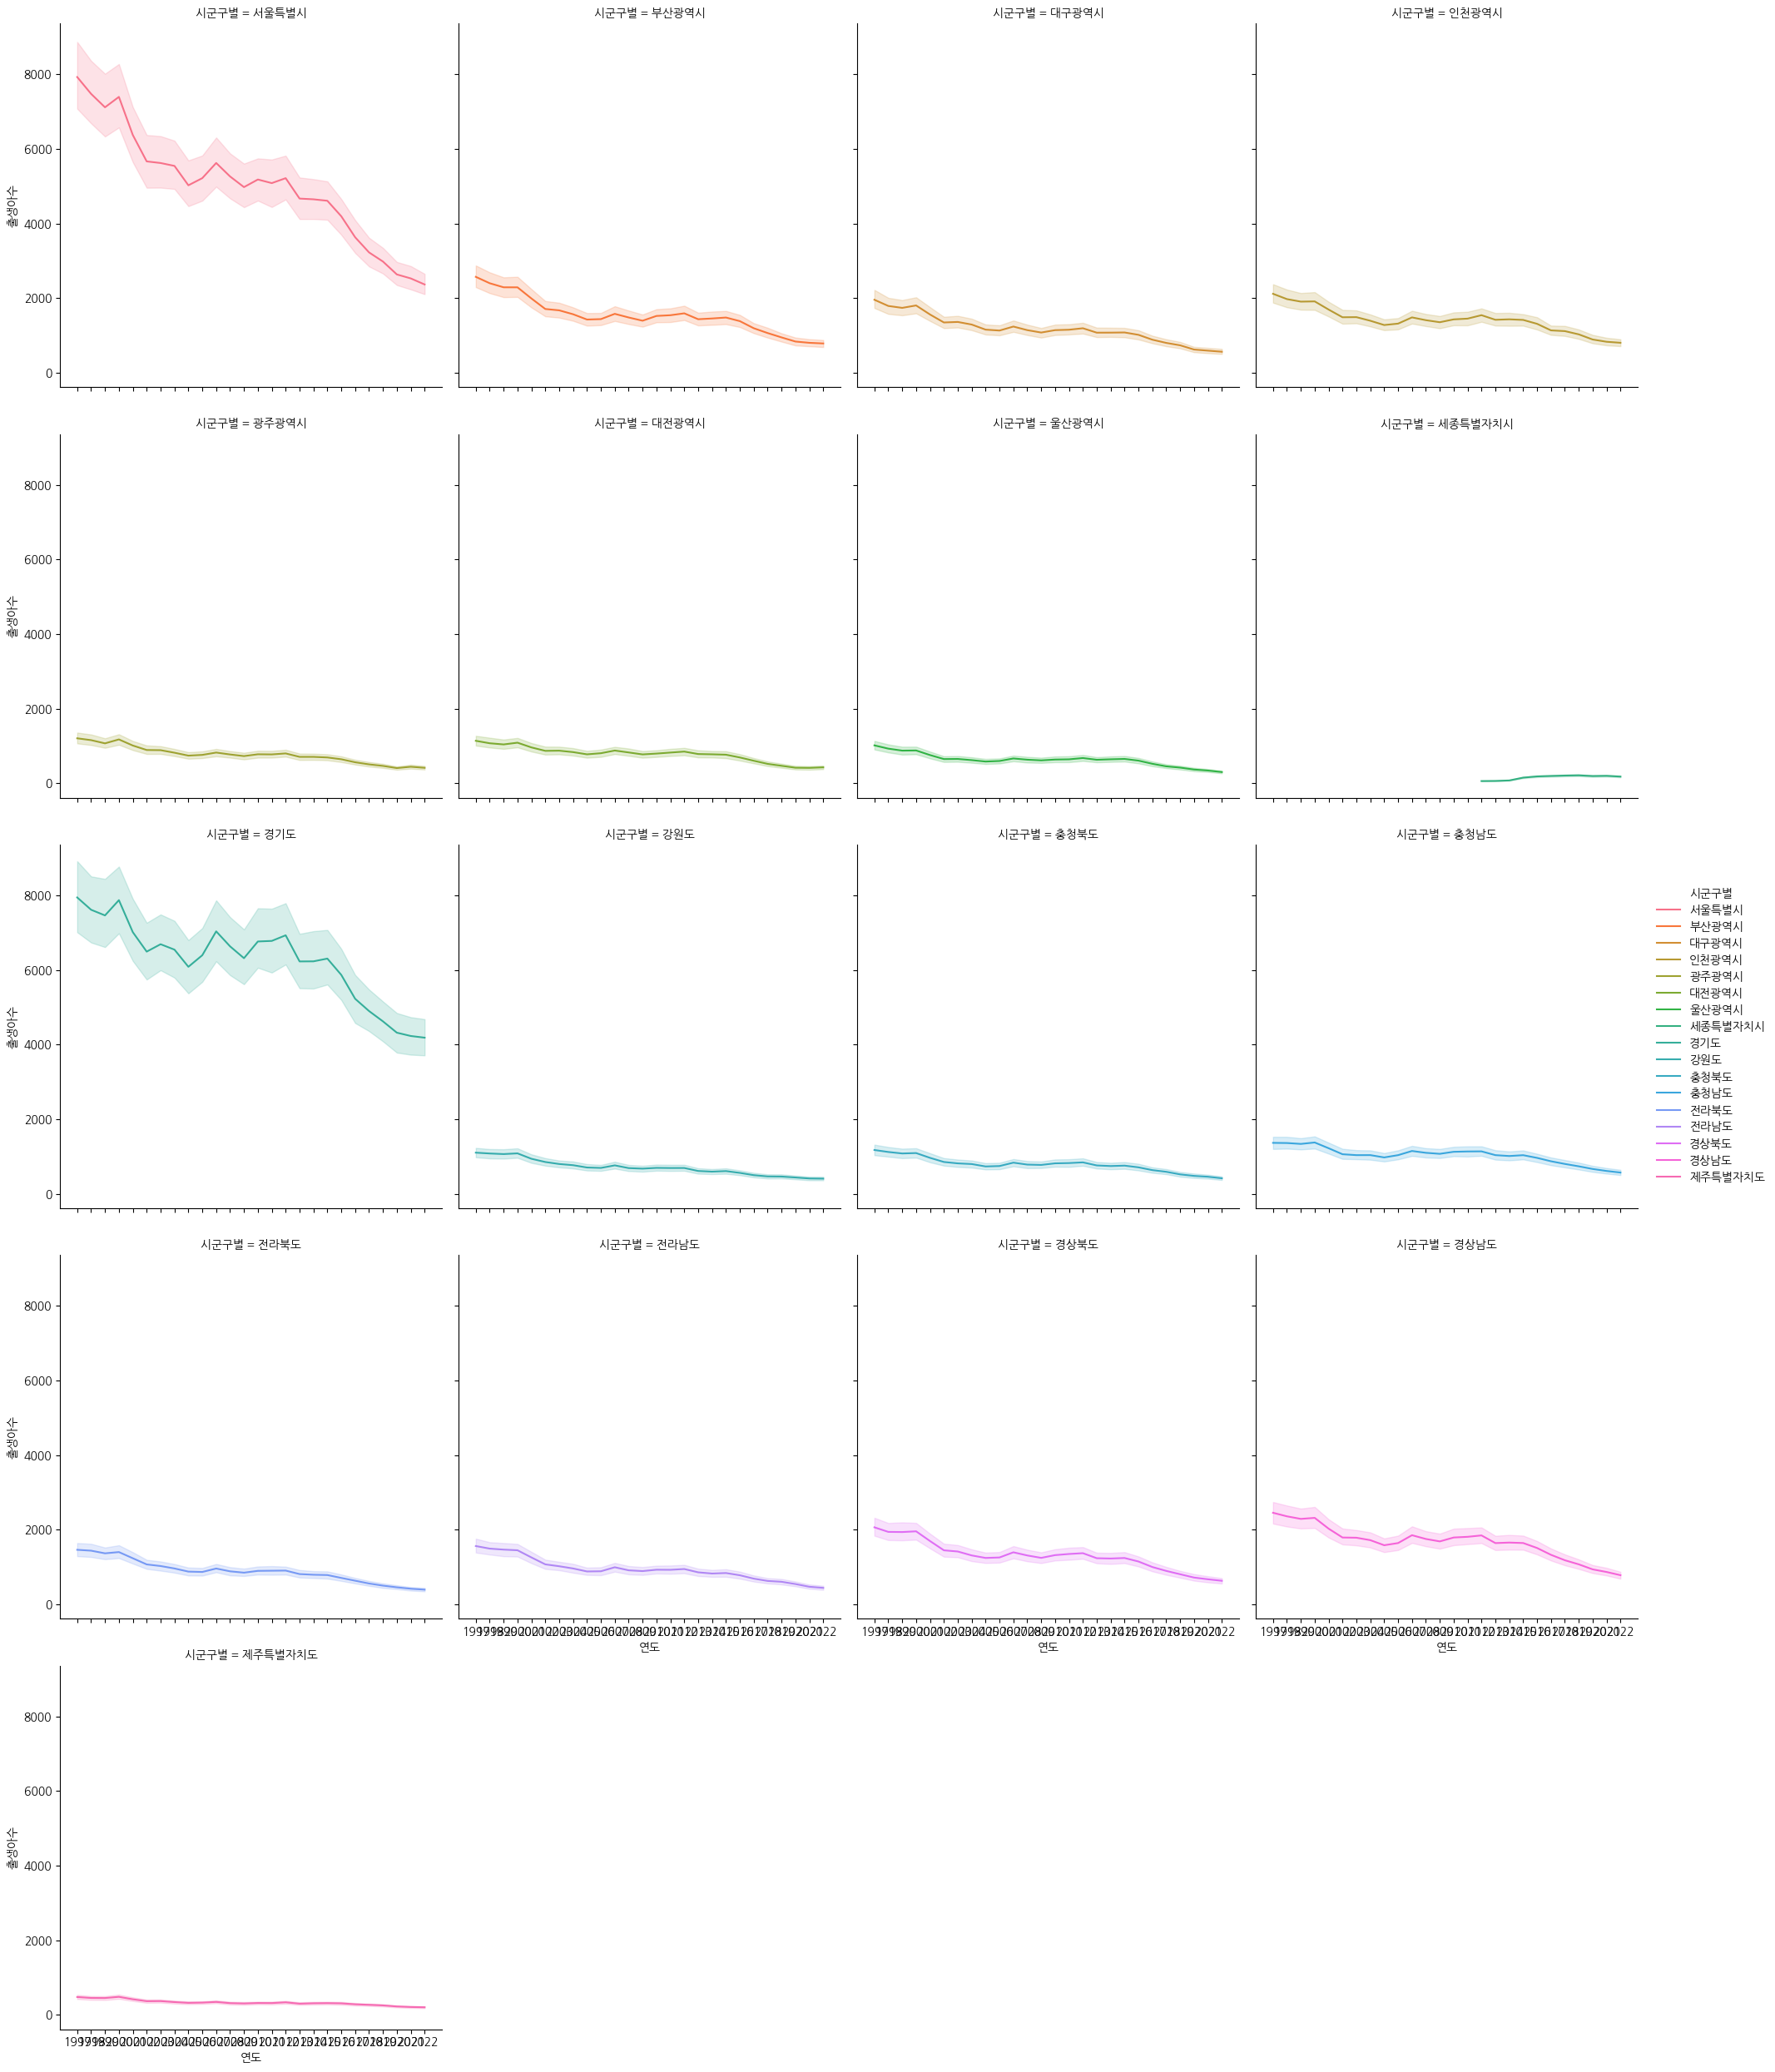

In [28]:
sns.relplot(x="연도",
            y="출생아수", kind="line", 
            data=df_local.sort_values(by=["연도", "월"]),  
            col="시군구별", 
            col_wrap=4, 
            hue="시군구별")